In [1]:
##Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_absolute_percentage_error
import warnings

In [2]:
## reading the file
AL_TES= pd.read_csv("Alabama.csv", index_col="DATE")
AL_TES

,STATION,NAME,STATE,REGION,LATITUDE,LONGITUDE,ELEVATION,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN
DATE,,,,,,,,,,,,,
2008-01-01,USC00013160,"GAINESVILLE LOCK, AL US",ALABAMA,SOUTH,32.83470,-88.13410,38.1,0.0,0.0,0.0,47.0,64.0,30.0
2008-01-02,USC00013160,"GAINESVILLE LOCK, AL US",ALABAMA,SOUTH,32.83470,-88.13410,38.1,0.0,0.0,0.0,37.5,48.0,27.0
2008-01-03,USC00013160,"GAINESVILLE LOCK, AL US",ALABAMA,SOUTH,32.83470,-88.13410,38.1,0.0,0.0,0.0,26.5,34.0,19.0
2008-01-04,USC00013160,"GAINESVILLE LOCK, AL US",ALABAMA,SOUTH,32.83470,-88.13410,38.1,0.0,0.0,0.0,28.5,39.0,18.0
2008-01-05,USC00013160,"GAINESVILLE LOCK, AL US",ALABAMA,SOUTH,32.83470,-88.13410,38.1,0.0,0.0,0.0,36.0,53.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,USC00010260,"LEXINGTON, AL US",ALABAMA,SOUTH,34.96285,-87.37195,231.6,0.0,0.0,0.0,28.5,34.0,23.0
2022-12-28,USC00010260,"LEXINGTON, AL US",ALABAMA,SOUTH,34.96285,-87.37195,231.6,0.0,0.0,0.0,34.5,45.0,24.0
2022-12-29,USC00010260,"LEXINGTON, AL US",ALABAMA,SOUTH,34.96285,-87.37195,231.6,0.0,0.0,0.0,45.0,59.0,31.0


In [3]:
# Convert 'DATE' to datetime format
AL_TES.index = pd.to_datetime(AL_TES.index)
AL_TES = AL_TES.sort_values(by='DATE')

In [4]:
# Selecting all numeric columns for time series analysis

AL_TES_num = AL_TES[['PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMAX', 'TMIN', 'LATITUDE', 'LONGITUDE']]
AL_TES_num.head(3)

,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,LATITUDE,LONGITUDE
DATE,,,,,,,,
2008-01-01,0.0,0.0,0.0,47.0,64.0,30.0,32.8347,-88.1341
2008-01-01,0.0,0.0,0.0,47.0,62.0,32.0,32.4110,-87.0144
2008-01-01,0.0,0.0,0.0,50.0,64.0,36.0,31.0383,-85.8708


## **Predicting TAVG**

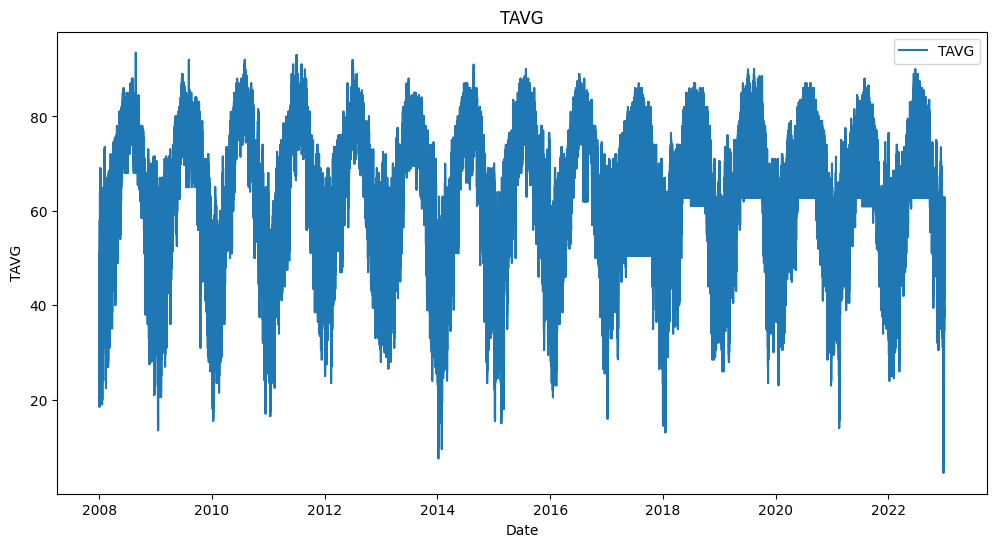

In [5]:
# Plot the TAVG
plt.figure(figsize=(12, 6))
plt.plot(AL_TES_num['TAVG'], label='TAVG')
plt.title('TAVG')
plt.xlabel('Date')
plt.ylabel('TAVG')
plt.legend()
plt.show()

### **Augmented Dickey-Fuller Test for Stationarity**

In [6]:
from statsmodels.tsa.stattools import adfuller

## Applying the Augmented Dickey-Fuller test
total_volume_series = AL_TES_num['TAVG']
result = adfuller(total_volume_series)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -9.278092357367568
p-value: 1.2727923360638695e-15


The p-value is less than the significance level 0.05 indicates that it rejects null hypothesis and the series is stationary.

### **AUTO-ARIMA**

In [7]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import pandas as pd


# Downsample to monthly data
monthly_data = AL_TES_num['TAVG'].resample('M').mean()

# Splitting the data into training and testing sets
train_size = int(len(monthly_data) * 0.8)
train, test = train_test_split(monthly_data, train_size=train_size)

# Using auto_arima with yearly seasonality
model = pm.auto_arima(train, seasonal=False, trace=True)

# Fitting the model to the training data
model.fit(train)

# Making forecasts and evaluating the model
forecast, conf_int = model.predict(n_periods=len(test), return_conf_int=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=953.226, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1609.888, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1429.388, Time=0.21 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=959.627, Time=0.21 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=955.069, Time=0.23 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.46 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=940.773, Time=0.63 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=943.587, Time=0.25 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=787.250, Time=1.06 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=827.814, Time=0.91 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=942.737, Time=1.13 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=inf, Time=0.71 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=959.676, Time=0.52 sec
 ARIMA(4,0,4)(0,0,0)[0]             : AIC=inf, Time=0.91 

In [8]:
warnings.filterwarnings("ignore")

from statsmodels.tsa.arima.model import ARIMA

# fit model
model_1 = ARIMA(AL_TES_num['TAVG'], order=(3,0,3))
model_TAVG = model_1.fit()

# summary of fit model
print(model_TAVG.summary())

                               SARIMAX Results                                
Dep. Variable:                   TAVG   No. Observations:               111873
Model:                 ARIMA(3, 0, 3)   Log Likelihood             -346721.797
Date:                Mon, 11 Mar 2024   AIC                         693459.593
Time:                        16:05:46   BIC                         693536.594
Sample:                             0   HQIC                        693482.844
                             - 111873                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         63.0961      1.487     42.434      0.000      60.182      66.010
ar.L1          0.1778      0.196      0.908      0.364      -0.206       0.562
ar.L2          0.0956      0.173      0.552      0.5

In [9]:
# Generate predictions for the extended period
one_step_forecast = model_TAVG.get_forecast(steps=365)

# Extract prediction mean
mean_forecast_2023 = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:, 'lower TAVG']
upper_limits = confidence_intervals.loc[:, 'upper TAVG']

# Set the index of the forecast DataFrame for 2023 to match the extended period
mean_forecast_2023.index = pd.date_range(start="2023-01-01", periods=365)
print(mean_forecast_2023)

2023-01-01    57.869400
2023-01-02    57.910141
2023-01-03    57.861055
2023-01-04    57.896936
2023-01-05    57.928029
                ...    
2023-12-27    60.450327
2023-12-28    60.455327
2023-12-29    60.460318
2023-12-30    60.465300
2023-12-31    60.470272
Freq: D, Name: predicted_mean, Length: 365, dtype: float64


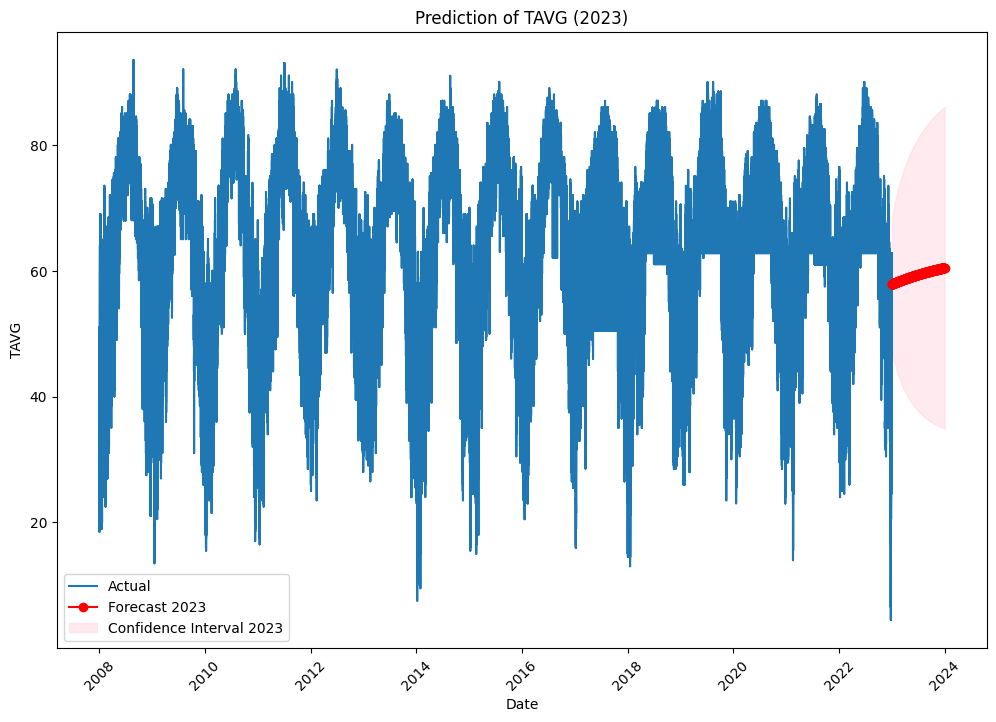

In [10]:
# Plot the actual values, and forecast for 2023
plt.figure(figsize=(12, 8))
plt.plot(AL_TES_num['TAVG'], label='Actual')
plt.plot(mean_forecast_2023.index, mean_forecast_2023, color='red', label='Forecast 2023', marker='o')
plt.fill_between(mean_forecast_2023.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Interval 2023')

# Customize the plot
plt.title('Prediction of TAVG (2023)')
plt.xlabel('Date')
plt.ylabel('TAVG')
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [11]:
# Generate predictions for the extended period
one_step_forecast = model_TAVG.get_prediction(steps=365)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:, 'lower TAVG']
upper_limits = confidence_intervals.loc[:, 'upper TAVG']

mean_forecast.index = AL_TES.index[-len(mean_forecast):]

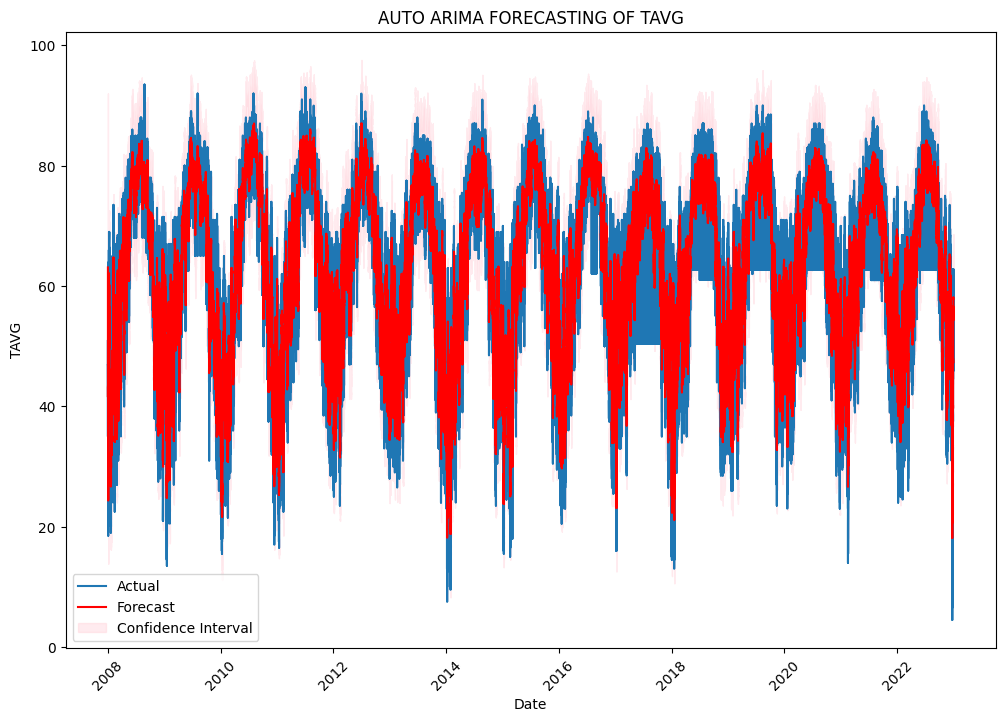

In [12]:
# Plot the TAVG with AUTO ARIMA
plt.figure(figsize=(12, 8))
plt.plot(AL_TES_num.index, AL_TES_num['TAVG'], label='Actual')
plt.plot(mean_forecast.index, mean_forecast, color='red', label='Forecast')

# Fill the area between confidence intervals
plt.fill_between(mean_forecast.index, lower_limits, upper_limits, color='pink', alpha=0.3, label='Confidence Interval')

# Customizing the plot
plt.title('AUTO ARIMA FORECASTING OF TAVG')
plt.xlabel('Date')
plt.ylabel('TAVG')
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [13]:
# Ensure the index of mean_forecast is of type DatetimeIndex
mean_forecast.index = pd.DatetimeIndex(mean_forecast.index)

# Extract actual values for the forecast period using the time range of the forecast
forecast_start_date = mean_forecast.index[0]
forecast_end_date = mean_forecast.index[-1]
actual_values = AL_TES_num['TAVG'][(AL_TES_num.index >= forecast_start_date) & (AL_TES_num.index <= forecast_end_date)]

# Calculate error metrics for the one-step-ahead forecast
mae = mean_absolute_error(actual_values, mean_forecast)
rmse = np.sqrt(mean_squared_error(actual_values, mean_forecast))
mape = np.mean(np.abs((actual_values - mean_forecast) / actual_values)) * 100
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAPE: {mape:.2f}%')

MAE: 3.90
RMSE: 5.37
MAPE: 7.13%


The prediction accuracy of the model is 92.87%

## **Predicting TMAX**

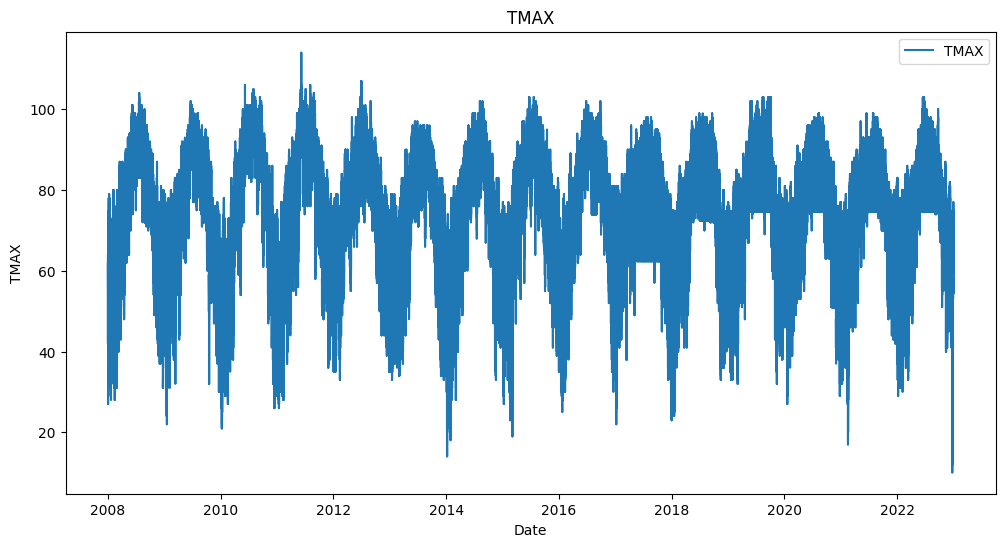

In [14]:
# Plot the TMAX
plt.figure(figsize=(12, 6))
plt.plot(AL_TES_num['TMAX'], label='TMAX')
plt.title('TMAX')
plt.xlabel('Date')
plt.ylabel('TMAX')
plt.legend()
plt.show()

### **Augmented Dickey-Fuller Test for Stationarity**

In [15]:
from statsmodels.tsa.stattools import adfuller

## Applying the Augmented Dickey-Fuller test
total_volume_series = AL_TES_num['TMAX']
result = adfuller(total_volume_series)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -9.675795057111257
p-value: 1.2418335138685114e-16


The p-value is less than the significance level of 0.05 so it rejects null hypothesis and the series is stationary

### **AUTO ARIMA**

In [16]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import pandas as pd


# Downsample to monthly data
monthly_data = AL_TES_num['TMAX'].resample('M').mean()

# Splitting the data into training and testing sets
train_size = int(len(monthly_data) * 0.8)
train, test = train_test_split(monthly_data, train_size=train_size)

# Using auto_arima with yearly seasonality
model = pm.auto_arima(train, seasonal=False, trace=True)

# Fitting the model to the training data
model.fit(train)

# Making forecasts and evaluating the model
forecast, conf_int = model.predict(n_periods=len(test), return_conf_int=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=950.057, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1657.749, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1472.663, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=954.218, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=952.067, Time=0.09 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=955.749, Time=0.29 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=944.737, Time=0.49 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=945.118, Time=0.26 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=846.517, Time=0.63 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=956.243, Time=0.96 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=945.624, Time=0.75 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=inf, Time=0.73 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=953.432, Time=0.70 sec
 ARIMA(4,0,4)(0,0,0)[0]             : AIC=inf, Time=1

In [17]:
# fit model
model_2 = ARIMA(AL_TES_num['TMAX'], order=(2,0,4))
model_TMAX = model_2.fit()

# summary of fit model
print(model_TMAX.summary())

                               SARIMAX Results                                
Dep. Variable:                   TMAX   No. Observations:               111873
Model:                 ARIMA(2, 0, 4)   Log Likelihood             -361329.110
Date:                Mon, 11 Mar 2024   AIC                         722674.220
Time:                        16:08:20   BIC                         722751.221
Sample:                             0   HQIC                        722697.470
                             - 111873                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         74.8265      1.512     49.486      0.000      71.863      77.790
ar.L1          0.1953      0.078      2.496      0.013       0.042       0.349
ar.L2          0.8010      0.078     10.257      0.0

In [18]:
# Generate predictions for the extended period
one_step_forecast = model_TMAX.get_forecast(steps=365)

# Extract prediction mean
mean_forecast_2023 = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:, 'lower TMAX']
upper_limits = confidence_intervals.loc[:, 'upper TMAX']

# Set the index of the forecast DataFrame for 2023 to match the extended period
mean_forecast_2023.index = pd.date_range(start="2023-01-01", periods=365)
print(mean_forecast_2023)

2023-01-01    66.227682
2023-01-02    66.361722
2023-01-03    66.290556
2023-01-04    66.337403
2023-01-05    66.331598
                ...    
2023-12-27    70.772976
2023-12-28    70.781378
2023-12-29    70.789762
2023-12-30    70.798129
2023-12-31    70.806479
Freq: D, Name: predicted_mean, Length: 365, dtype: float64


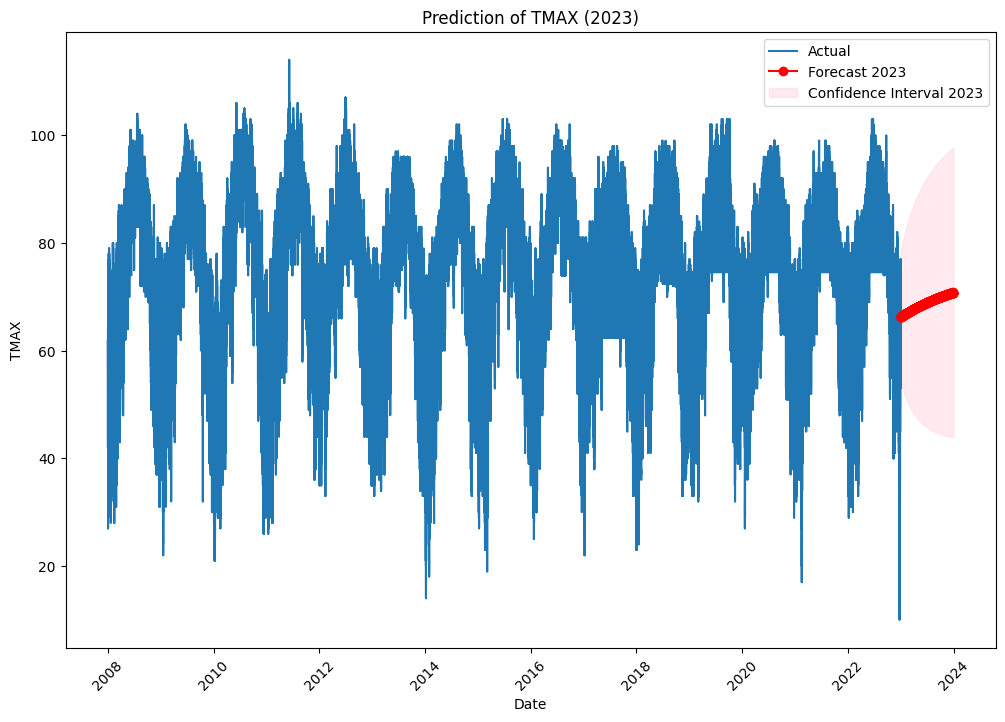

In [19]:
# Plot the actual values, and forecast for 2023
plt.figure(figsize=(12, 8))
plt.plot(AL_TES_num['TMAX'], label='Actual')
plt.plot(mean_forecast_2023.index, mean_forecast_2023, color='red', label='Forecast 2023', marker='o')
plt.fill_between(mean_forecast_2023.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Interval 2023')

# Customize the plot
plt.title('Prediction of TMAX (2023)')
plt.xlabel('Date')
plt.ylabel('TMAX')
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [20]:
# Generate predictions for the extended period
one_step_forecast = model_TMAX.get_prediction(steps=365)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:, 'lower TMAX']
upper_limits = confidence_intervals.loc[:, 'upper TMAX']

mean_forecast.index = AL_TES.index[-len(mean_forecast):]

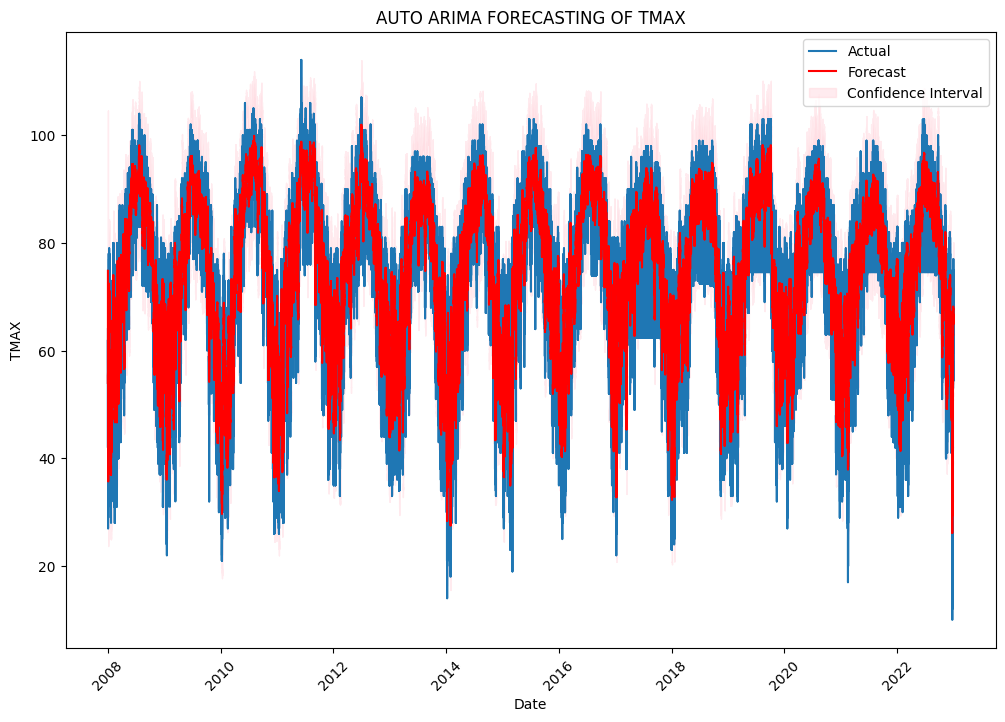

In [21]:
# Plot the 'TMAX' with correct date index
plt.figure(figsize=(12, 8))
plt.plot(AL_TES_num.index, AL_TES_num['TMAX'], label='Actual')
plt.plot(mean_forecast.index, mean_forecast, color='red', label='Forecast')

# Fill the area between confidence intervals
plt.fill_between(mean_forecast.index, lower_limits, upper_limits, color='pink', alpha=0.3, label='Confidence Interval')

# Customizing the plot
plt.title('AUTO ARIMA FORECASTING OF TMAX')
plt.xlabel('Date')
plt.ylabel('TMAX')
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [22]:
# Ensure the index of mean_forecast is of type DatetimeIndex
mean_forecast.index = pd.DatetimeIndex(mean_forecast.index)

# Extract actual values for the forecast period using the time range of the forecast
forecast_start_date = mean_forecast.index[0]
forecast_end_date = mean_forecast.index[-1]
actual_values = AL_TES_num['TMAX'][(AL_TES_num.index >= forecast_start_date) & (AL_TES_num.index <= forecast_end_date)]

# Calculate error metrics for the one-step-ahead forecast
mae = mean_absolute_error(actual_values, mean_forecast)
rmse = np.sqrt(mean_squared_error(actual_values, mean_forecast))
mape = np.mean(np.abs((actual_values - mean_forecast) / actual_values)) * 100
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAPE: {mape:.2f}%')

MAE: 4.47
RMSE: 6.12
MAPE: 6.81%


The prediction accuracy is 93.19%

## **Predicting TMIN**

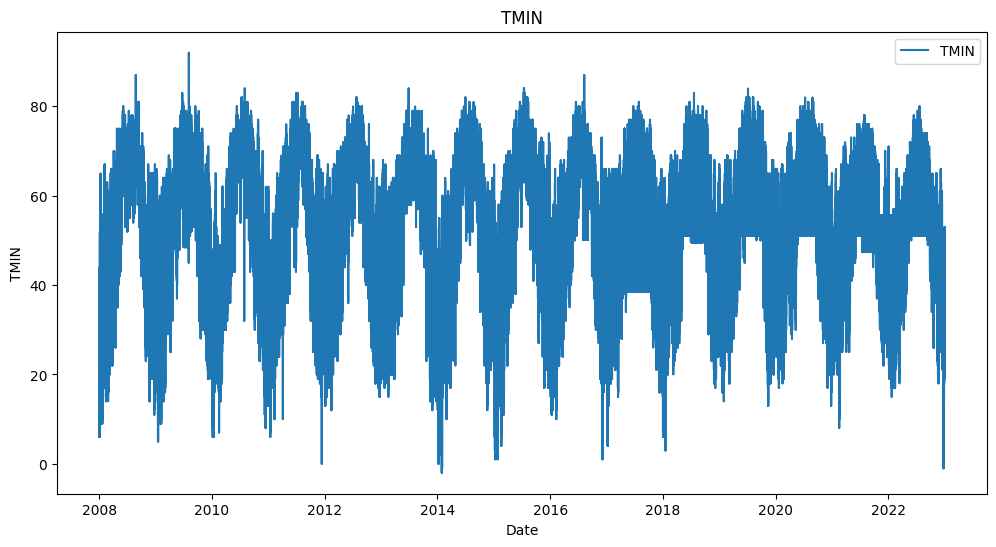

In [23]:
# Plot the TMIN
plt.figure(figsize=(12, 6))
plt.plot(AL_TES_num['TMIN'], label='TMIN')
plt.title('TMIN')
plt.xlabel('Date')
plt.ylabel('TMIN')
plt.legend()
plt.show()

### **Augmented Dickey-Fuller Test for Stationarity**

In [24]:
from statsmodels.tsa.stattools import adfuller

## Applying the Augmented Dickey-Fuller test
total_volume_series = AL_TES_num['TMIN']
result = adfuller(total_volume_series)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -10.306018454235645
p-value: 3.2774130070668095e-18


The p-value is less than the significance level 0.05 indicates that it rejects null hypothesis and the series is stationary.

### **AUTO-ARIMA**

In [25]:
# Downsample to monthly data
monthly_data = AL_TES_num['TMIN'].resample('M').mean()

# Splitting the data into training and testing sets
train_size = int(len(monthly_data) * 0.8)
train, test = train_test_split(monthly_data, train_size=train_size)

# Using auto_arima with yearly seasonality
model = pm.auto_arima(train, seasonal=False, trace=True)

# Fitting the model to the training data
model.fit(train)

# Making forecasts and evaluating the model
forecast, conf_int = model.predict(n_periods=len(test), return_conf_int=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=980.196, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1556.126, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1017.015, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1382.491, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=986.749, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=982.783, Time=0.10 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=985.779, Time=0.45 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=966.985, Time=0.60 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=970.702, Time=0.26 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=805.613, Time=0.69 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=inf, Time=0.78 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=967.388, Time=0.47 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=inf, Time=0.73 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=nan sec
 ARIMA(4,0,4)(0,0,0)[0]             : AIC=968.662, Time=0

In [26]:
# fit model
model_3 = ARIMA(AL_TES_num['TMIN'], order=(3,0,3))
model_TMIN = model_3.fit()

# summary of fit model
print(model_TMIN.summary())

                               SARIMAX Results                                
Dep. Variable:                   TMIN   No. Observations:               111873
Model:                 ARIMA(3, 0, 3)   Log Likelihood             -364873.506
Date:                Mon, 11 Mar 2024   AIC                         729763.012
Time:                        16:10:35   BIC                         729840.013
Sample:                             0   HQIC                        729786.263
                             - 111873                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.8334      1.348     38.445      0.000      49.191      54.476
ar.L1          0.2450      0.158      1.549      0.121      -0.065       0.555
ar.L2          0.0001      0.172      0.001      0.9

In [27]:
# Generate predictions for the extended period
one_step_forecast = model_TMIN.get_forecast(steps=365)

# Extract prediction mean
mean_forecast_2023 = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:, 'lower TMIN']
upper_limits = confidence_intervals.loc[:, 'upper TMIN']

# Set the index of the forecast DataFrame for 2023 to match the extended period
mean_forecast_2023.index = pd.date_range(start="2023-01-01", periods=365)
print(mean_forecast_2023)

2023-01-01    49.506753
2023-01-02    49.524894
2023-01-03    49.467245
2023-01-04    49.510686
2023-01-05    49.534911
                ...    
2023-12-27    50.824167
2023-12-28    50.826525
2023-12-29    50.828878
2023-12-30    50.831225
2023-12-31    50.833567
Freq: D, Name: predicted_mean, Length: 365, dtype: float64


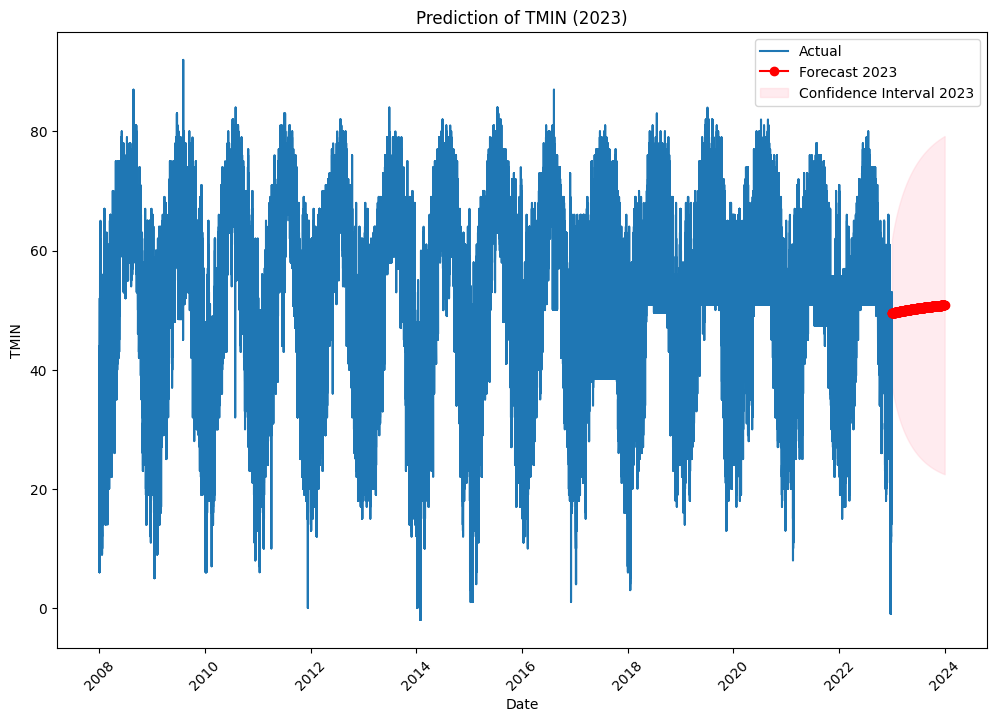

In [28]:
# Plot the actual values, and forecast for 2023
plt.figure(figsize=(12, 8))
plt.plot(AL_TES_num['TMIN'], label='Actual')
plt.plot(mean_forecast_2023.index, mean_forecast_2023, color='red', label='Forecast 2023', marker='o')
plt.fill_between(mean_forecast_2023.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Interval 2023')

# Customize the plot
plt.title('Prediction of TMIN (2023)')
plt.xlabel('Date')
plt.ylabel('TMIN')
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [29]:
# Generate predictions for the extended period
one_step_forecast = model_TMIN.get_prediction(steps=365)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:, 'lower TMIN']
upper_limits = confidence_intervals.loc[:, 'upper TMIN']

mean_forecast.index = AL_TES.index[-len(mean_forecast):]

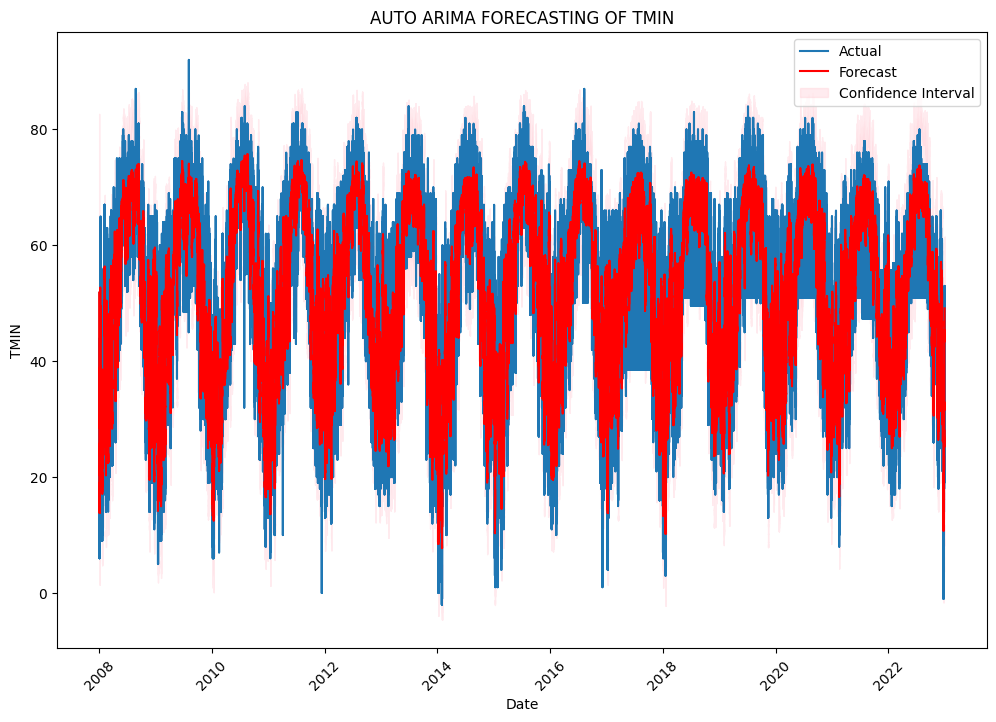

In [30]:
# Plot the 'TMIN' with correct date index
plt.figure(figsize=(12, 8))
plt.plot(AL_TES_num.index, AL_TES_num['TMIN'], label='Actual')
plt.plot(mean_forecast.index, mean_forecast, color='red', label='Forecast')

# Fill the area between confidence intervals
plt.fill_between(mean_forecast.index, lower_limits, upper_limits, color='pink', alpha=0.3, label='Confidence Interval')

# Customizing the plot
plt.title('AUTO ARIMA FORECASTING OF TMIN')
plt.xlabel('Date')
plt.ylabel('TMIN')
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [31]:
# Ensure the index of mean_forecast is of type DatetimeIndex
mean_forecast.index = pd.DatetimeIndex(mean_forecast.index)

# Extract actual values for the forecast period using the time range of the forecast
forecast_start_date = mean_forecast.index[0]
forecast_end_date = mean_forecast.index[-1]
actual_values = AL_TES_num['TMIN'][(AL_TES_num.index >= forecast_start_date) & (AL_TES_num.index <= forecast_end_date)]

# Calculate error metrics for the one-step-ahead forecast
mae = mean_absolute_error(actual_values, mean_forecast)
rmse = np.sqrt(mean_squared_error(actual_values, mean_forecast))
mape = np.mean(np.abs((actual_values - mean_forecast) / actual_values)) * 100
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAPE: {mape:.2f}%')

MAE: 4.60
RMSE: 6.31
MAPE: inf%


The accuracy is showing as inf as there are 0's present for TMIN

In [32]:
# Ensure the index of mean_forecast is of type DatetimeIndex
mean_forecast.index = pd.DatetimeIndex(mean_forecast.index)

# Extract actual values for the forecast period using the time range of the forecast
forecast_start_date = mean_forecast.index[0]
forecast_end_date = mean_forecast.index[-1]
actual_values = AL_TES_num['TMIN'][(AL_TES_num.index >= forecast_start_date) & (AL_TES_num.index <= forecast_end_date)]

# Calculate error metrics for the one-step-ahead forecast
mae = mean_absolute_error(actual_values, mean_forecast)
rmse = np.sqrt(mean_squared_error(actual_values, mean_forecast))

# Calculate MAPE excluding zero values in the actual data
non_zero_indices = actual_values != 0
mape_values = np.abs((actual_values[non_zero_indices] - mean_forecast[non_zero_indices]) / actual_values[non_zero_indices])
mape = np.mean(mape_values) * 100

print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAPE: {mape:.2f}%')


MAE: 4.60
RMSE: 6.31
MAPE: 11.17%


When we exclude the 0's the prediction  accuracy is 88.83%

## **Predicting PRCP**

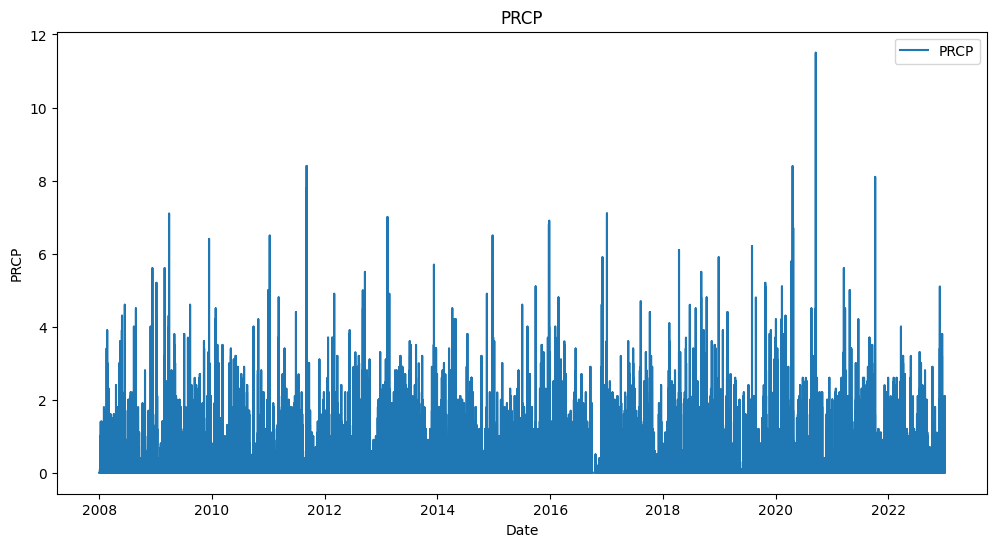

In [33]:
# Plot the PRCP
plt.figure(figsize=(12, 6))
plt.plot(AL_TES_num['PRCP'], label='PRCP')
plt.title('PRCP')
plt.xlabel('Date')
plt.ylabel('PRCP')
plt.legend()
plt.show()

In [34]:
from statsmodels.tsa.stattools import adfuller

## Applying the Augmented Dickey-Fuller test
total_volume_series = AL_TES_num['PRCP']
result = adfuller(total_volume_series)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -42.39860082506879
p-value: 0.0


The p-value is less than the significance level 0.05 indicates that it rejects null hypothesis and the series is stationary.

### **AUTO-ARIMA**

In [35]:
# Downsample to monthly data
monthly_data = AL_TES_num['PRCP'].resample('M').mean()

# Splitting the data into training and testing sets
train_size = int(len(monthly_data) * 0.8)
train, test = train_test_split(monthly_data, train_size=train_size)

# Using auto_arima with yearly seasonality
model = pm.auto_arima(train, seasonal=False, trace=True)

# Fitting the model to the training data
model.fit(train)

# Making forecasts and evaluating the model
forecast, conf_int = model.predict(n_periods=len(test), return_conf_int=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.62 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-193.432, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-367.139, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-262.734, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-411.126, Time=0.09 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-412.369, Time=0.21 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=-423.920, Time=0.38 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=-428.245, Time=0.38 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=-426.500, Time=0.57 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=-439.986, Time=0.54 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-444.680, Time=0.42 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.32 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-444.038, Time=0.97 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=-443.692, Time=0.83 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-

In [36]:
# fit model
model_4 = ARIMA(AL_TES_num['PRCP'], order=(0,0,3))
model_PRCP = model_4.fit()

# summary of fit model
print(model_PRCP.summary())

                               SARIMAX Results                                
Dep. Variable:                   PRCP   No. Observations:               111873
Model:                 ARIMA(0, 0, 3)   Log Likelihood              -49346.988
Date:                Mon, 11 Mar 2024   AIC                          98703.976
Time:                        16:12:09   BIC                          98752.102
Sample:                             0   HQIC                         98718.508
                             - 111873                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1192      0.003     45.219      0.000       0.114       0.124
ma.L1          0.1846      0.001    153.171      0.000       0.182       0.187
ma.L2          0.1537      0.001    118.620      0.0

In [37]:
# Generate predictions for the extended period
one_step_forecast = model_PRCP.get_forecast(steps=365)

# Extract prediction mean
mean_forecast_2023 = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:, 'lower PRCP']
upper_limits = confidence_intervals.loc[:, 'upper PRCP']

# Set the index of the forecast DataFrame for 2023 to match the extended period
mean_forecast_2023.index = pd.date_range(start="2023-01-01", periods=365)
print(mean_forecast_2023)

2023-01-01    0.170403
2023-01-02    0.134320
2023-01-03    0.127739
2023-01-04    0.119245
2023-01-05    0.119245
                ...   
2023-12-27    0.119245
2023-12-28    0.119245
2023-12-29    0.119245
2023-12-30    0.119245
2023-12-31    0.119245
Freq: D, Name: predicted_mean, Length: 365, dtype: float64


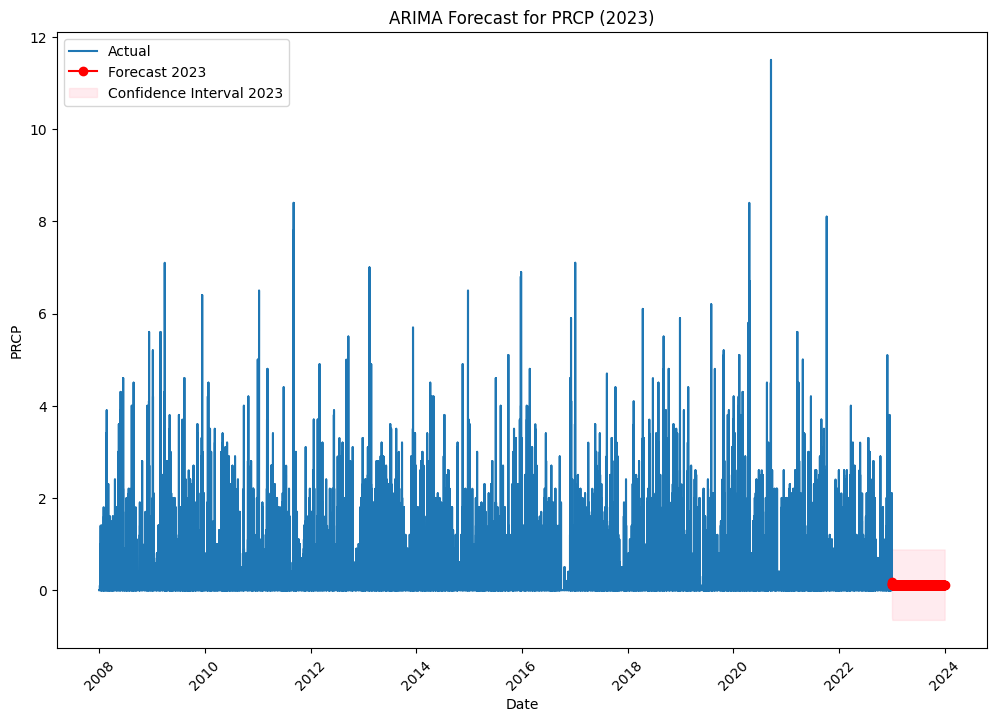

In [38]:
# Plot the actual values, and forecast for 2023
plt.figure(figsize=(12, 8))
plt.plot(AL_TES_num['PRCP'], label='Actual')
plt.plot(mean_forecast_2023.index, mean_forecast_2023, color='red', label='Forecast 2023', marker='o')
plt.fill_between(mean_forecast_2023.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Interval 2023')

# Customize the plot
plt.title('ARIMA Forecast for PRCP (2023)')
plt.xlabel('Date')
plt.ylabel('PRCP')
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [39]:
# Generate predictions for the extended period
one_step_forecast = model_PRCP.get_prediction(steps=365)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:, 'lower PRCP']
upper_limits = confidence_intervals.loc[:, 'upper PRCP']

mean_forecast.index = AL_TES.index[-len(mean_forecast):]

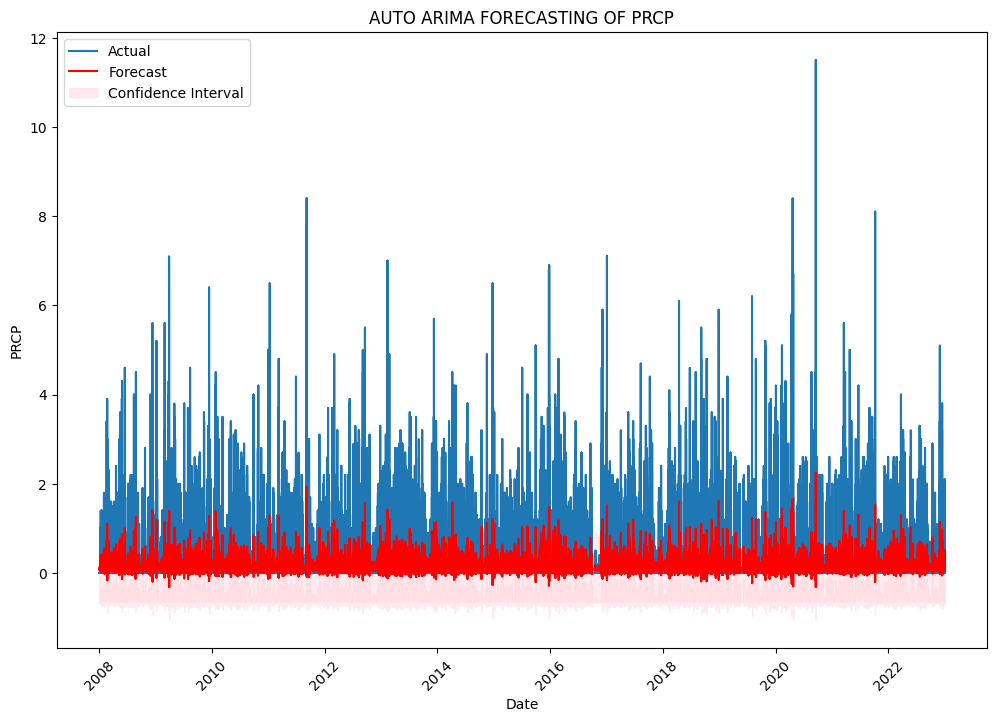

In [40]:
# Plot the 'PRCP' with correct date index
plt.figure(figsize=(12, 8))
plt.plot(AL_TES_num.index, AL_TES_num['PRCP'], label='Actual')
plt.plot(mean_forecast.index, mean_forecast, color='red', label='Forecast')

# Fill the area between confidence intervals
plt.fill_between(mean_forecast.index, lower_limits, upper_limits, color='pink', alpha=0.3, label='Confidence Interval')

# Customizing the plot
plt.title('AUTO ARIMA FORECASTING OF PRCP')
plt.xlabel('Date')
plt.ylabel('PRCP')
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [64]:
# Ensure the index of mean_forecast is of type DatetimeIndex
mean_forecast.index = pd.DatetimeIndex(mean_forecast.index)

# Extract actual values for the forecast period using the time range of the forecast
forecast_start_date = mean_forecast.index[0]
forecast_end_date = mean_forecast.index[-1]
actual_values = AL_TES_num['PRCP'][(AL_TES_num.index >= forecast_start_date) & (AL_TES_num.index <= forecast_end_date)]

# Calculate error metrics for the one-step-ahead forecast
mae = mean_absolute_error(actual_values, mean_forecast)
rmse = np.sqrt(mean_squared_error(actual_values, mean_forecast))
mape = mean_absolute_percentage_error(actual_values, mean_forecast)
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAPE: {mape:.2f}%')

MAE: 0.19
RMSE: 0.60
MAPE: 312276626437464.31%


The accuracy is showing as inf as there are 0's present for PRCP

In [42]:
mean_forecast.index = pd.DatetimeIndex(mean_forecast.index)

# Extract actual values for the forecast period using the time range of the forecast
forecast_start_date = mean_forecast.index[0]
forecast_end_date = mean_forecast.index[-1]
actual_values = AL_TES_num['PRCP'][(AL_TES_num.index >= forecast_start_date) & (AL_TES_num.index <= forecast_end_date)]

# Calculate error metrics for the one-step-ahead forecast
mae = mean_absolute_error(actual_values, mean_forecast)
rmse = np.sqrt(mean_squared_error(actual_values, mean_forecast))

# Calculate MAPE excluding zero values in the actual data
non_zero_indices = actual_values != 0
mape_values = np.abs((actual_values[non_zero_indices] - mean_forecast[non_zero_indices]) / actual_values[non_zero_indices])
mape = np.mean(mape_values) * 100

print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAPE: {mape:.2f}%')


MAE: 0.18
RMSE: 0.38
MAPE: 67.84%


The accuracy after excluding 0's is 32.16% and it is not valid as there would not be precipitation for all the months

## **Predicting SNOW**

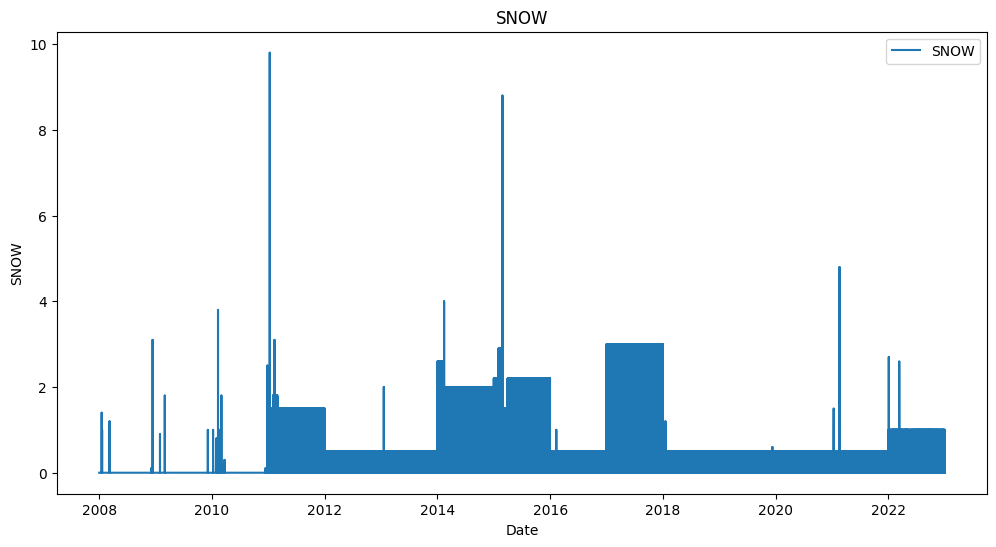

In [43]:
# Plot the SNOW
plt.figure(figsize=(12, 6))
plt.plot(AL_TES_num['SNOW'], label='SNOW')
plt.title('SNOW')
plt.xlabel('Date')
plt.ylabel('SNOW')
plt.legend()
plt.show()

### **Augmented Dickey-Fuller Test for Stationarity**

In [44]:
from statsmodels.tsa.stattools import adfuller

## Applying the Augmented Dickey-Fuller test
total_volume_series = AL_TES_num['SNOW']
result = adfuller(total_volume_series)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -8.341819583417056
p-value: 3.161134080691096e-13


The p-value is less than the significance level 0.05 indicates that it rejects null hypothesis and the series is stationary.

### **AUTO-ARIMA**

In [45]:
# Downsample to monthly data
monthly_data = AL_TES_num['SNOW'].resample('M').mean()

# Splitting the data into training and testing sets
train_size = int(len(monthly_data) * 0.8)
train, test = train_test_split(monthly_data, train_size=train_size)

# Using auto_arima with yearly seasonality
model = pm.auto_arima(train, seasonal=False, trace=True)

# Fitting the model to the training data
model.fit(train)

# Making forecasts and evaluating the model
forecast, conf_int = model.predict(n_periods=len(test), return_conf_int=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-454.973, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-459.599, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-460.807, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-460.550, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-461.587, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-458.927, Time=0.12 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.464 seconds


In [46]:
# fit model
model_5 = ARIMA(AL_TES_num['SNOW'], order=(0,1,0))
model_SNOW = model_5.fit()

# summary of fit model
print(model_SNOW.summary())

                               SARIMAX Results                                
Dep. Variable:                   SNOW   No. Observations:               111873
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -77558.390
Date:                Mon, 11 Mar 2024   AIC                         155118.780
Time:                        16:13:06   BIC                         155128.405
Sample:                             0   HQIC                        155121.687
                             - 111873                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.2343      0.000    797.559      0.000       0.234       0.235
Ljung-Box (L1) (Q):               28161.01   Jarque-Bera (JB):           2005730.11
Prob(Q):                              0.00   Pr

In [47]:
# Generate predictions for the extended period
one_step_forecast = model_SNOW.get_forecast(steps=365)

# Extract prediction mean
mean_forecast_2023 = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:, 'lower SNOW']
upper_limits = confidence_intervals.loc[:, 'upper SNOW']

# Set the index of the forecast DataFrame for 2023 to match the extended period
mean_forecast_2023.index = pd.date_range(start="2023-01-01", periods=365)
print(mean_forecast_2023)

2023-01-01    1.110223e-16
2023-01-02    1.110223e-16
2023-01-03    1.110223e-16
2023-01-04    1.110223e-16
2023-01-05    1.110223e-16
                  ...     
2023-12-27    1.110223e-16
2023-12-28    1.110223e-16
2023-12-29    1.110223e-16
2023-12-30    1.110223e-16
2023-12-31    1.110223e-16
Freq: D, Name: predicted_mean, Length: 365, dtype: float64


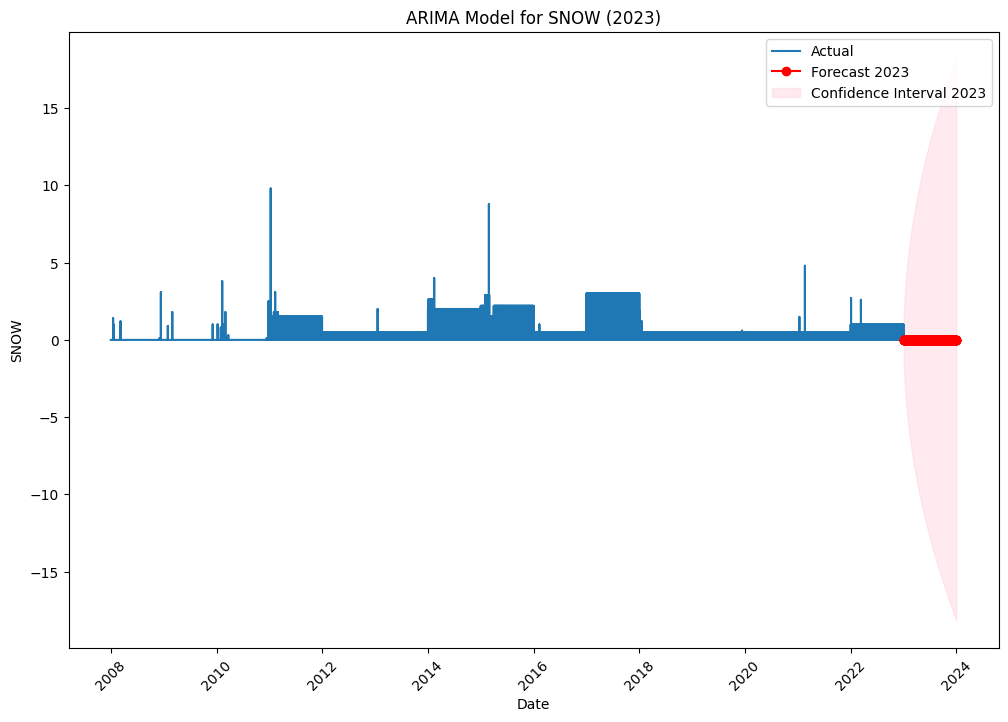

In [48]:
# Plot the actual values, and forecast for 2023
plt.figure(figsize=(12, 8))
plt.plot(AL_TES_num['SNOW'], label='Actual')
plt.plot(mean_forecast_2023.index, mean_forecast_2023, color='red', label='Forecast 2023', marker='o')
plt.fill_between(mean_forecast_2023.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Interval 2023')

# Customize the plot
plt.title('ARIMA Model for SNOW (2023)')
plt.xlabel('Date')
plt.ylabel('SNOW')
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [49]:
# Generate predictions for the extended period
one_step_forecast = model_SNOW.get_prediction(steps=365)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:, 'lower SNOW']
upper_limits = confidence_intervals.loc[:, 'upper SNOW']

mean_forecast.index = AL_TES.index[-len(mean_forecast):]

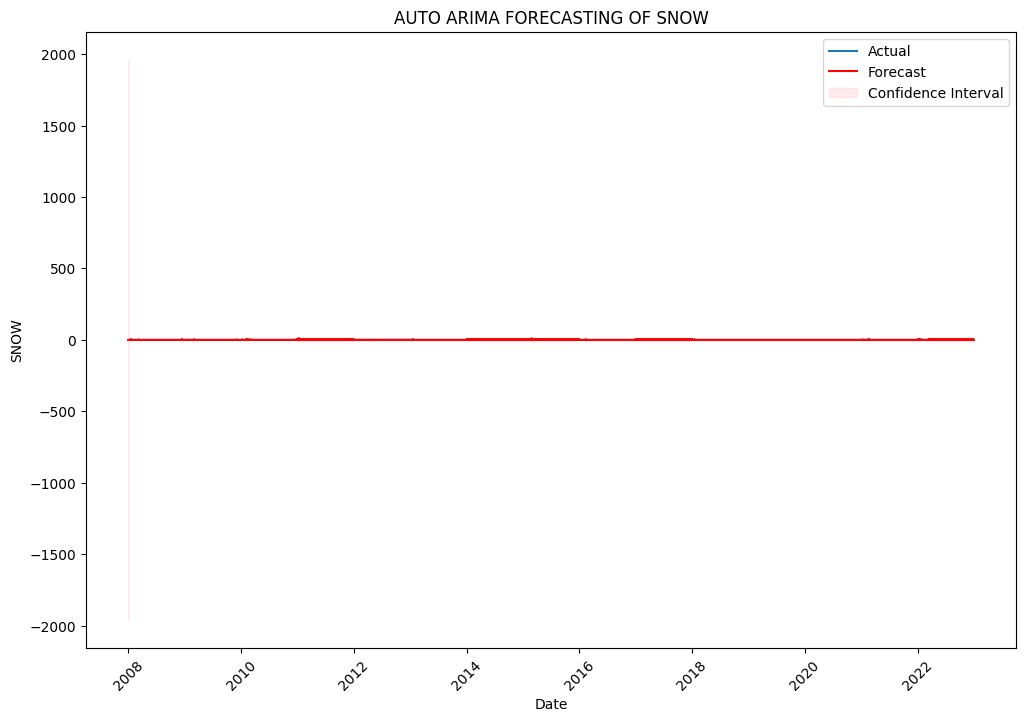

In [50]:
# Plot the 'SNOW' with correct date index
plt.figure(figsize=(12, 8))
plt.plot(AL_TES_num.index, AL_TES_num['SNOW'], label='Actual')
plt.plot(mean_forecast.index, mean_forecast, color='red', label='Forecast')

# Fill the area between confidence intervals
plt.fill_between(mean_forecast.index, lower_limits, upper_limits, color='pink', alpha=0.3, label='Confidence Interval')

# Customizing the plot
plt.title('AUTO ARIMA FORECASTING OF SNOW')
plt.xlabel('Date')
plt.ylabel('SNOW')
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [65]:
# Ensure the index of mean_forecast is of type DatetimeIndex
mean_forecast.index = pd.DatetimeIndex(mean_forecast.index)

# Extract actual values for the forecast period using the time range of the forecast
forecast_start_date = mean_forecast.index[0]
forecast_end_date = mean_forecast.index[-1]
actual_values = AL_TES_num['SNOW'][(AL_TES_num.index >= forecast_start_date) & (AL_TES_num.index <= forecast_end_date)]

# Calculate error metrics for the one-step-ahead forecast
mae = mean_absolute_error(actual_values, mean_forecast)
rmse = np.sqrt(mean_squared_error(actual_values, mean_forecast))
mape = mean_absolute_percentage_error(actual_values, mean_forecast)
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAPE: {mape:.2f}%')

MAE: 0.18
RMSE: 0.57
MAPE: 312799959101787.25%


## **Predicting SNWD**

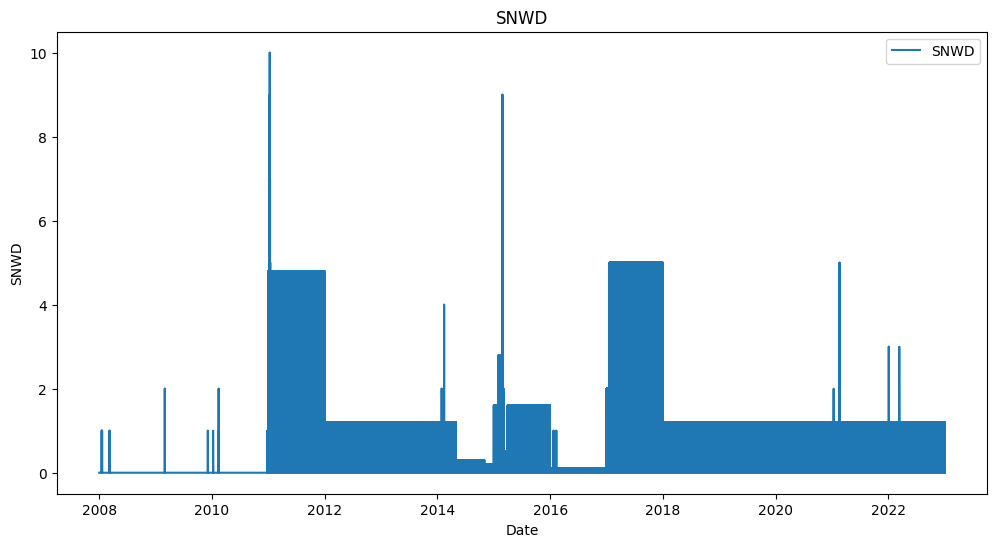

In [52]:
# Plot the SNWD
plt.figure(figsize=(12, 6))
plt.plot(AL_TES_num['SNWD'], label='SNWD')
plt.title('SNWD')
plt.xlabel('Date')
plt.ylabel('SNWD')
plt.legend()
plt.show()

### **Augmented Dickey-Fuller Test for Stationarity**

In [53]:
from statsmodels.tsa.stattools import adfuller

## Applying the Augmented Dickey-Fuller test
total_volume_series = AL_TES_num['SNWD']
result = adfuller(total_volume_series)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -10.431277426909906
p-value: 1.6083331340763044e-18


The p-value is less than the significance level 0.05 indicates that it rejects null hypothesis and the series is stationary.

### **AUTO ARIMA**

In [54]:
# Downsample to monthly data
monthly_data = AL_TES_num['SNOW'].resample('M').mean()

# Splitting the data into training and testing sets
train_size = int(len(monthly_data) * 0.8)
train, test = train_test_split(monthly_data, train_size=train_size)

# Using auto_arima with yearly seasonality
model = pm.auto_arima(train, seasonal=False, trace=True)

# Fitting the model to the training data
model.fit(train)

# Making forecasts and evaluating the model
forecast, conf_int = model.predict(n_periods=len(test), return_conf_int=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-454.973, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-459.599, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-460.807, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-460.550, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-461.587, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-458.927, Time=0.14 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.654 seconds


In [55]:
# fit model
model_6 = ARIMA(AL_TES_num['SNWD'], order=(0,1,0))
model_SNWD = model_6.fit()

# summary of fit model
print(model_SNWD.summary())

                               SARIMAX Results                                
Dep. Variable:                   SNWD   No. Observations:               111873
Model:                 ARIMA(0, 1, 0)   Log Likelihood             -109228.983
Date:                Mon, 11 Mar 2024   AIC                         218459.967
Time:                        16:14:02   BIC                         218469.592
Sample:                             0   HQIC                        218462.873
                             - 111873                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.4127      0.000   1110.920      0.000       0.412       0.413
Ljung-Box (L1) (Q):               28061.01   Jarque-Bera (JB):           8272091.00
Prob(Q):                              0.00   Pr

In [56]:
# Generate predictions for the extended period
one_step_forecast = model_SNWD.get_forecast(steps=365)

# Extract prediction mean
mean_forecast_2023 = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:, 'lower SNWD']
upper_limits = confidence_intervals.loc[:, 'upper SNWD']

# Set the index of the forecast DataFrame for 2023 to match the extended period
mean_forecast_2023.index = pd.date_range(start="2023-01-01", periods=365)
print(mean_forecast_2023)

2023-01-01    2.465190e-32
2023-01-02    2.465190e-32
2023-01-03    2.465190e-32
2023-01-04    2.465190e-32
2023-01-05    2.465190e-32
                  ...     
2023-12-27    2.465190e-32
2023-12-28    2.465190e-32
2023-12-29    2.465190e-32
2023-12-30    2.465190e-32
2023-12-31    2.465190e-32
Freq: D, Name: predicted_mean, Length: 365, dtype: float64


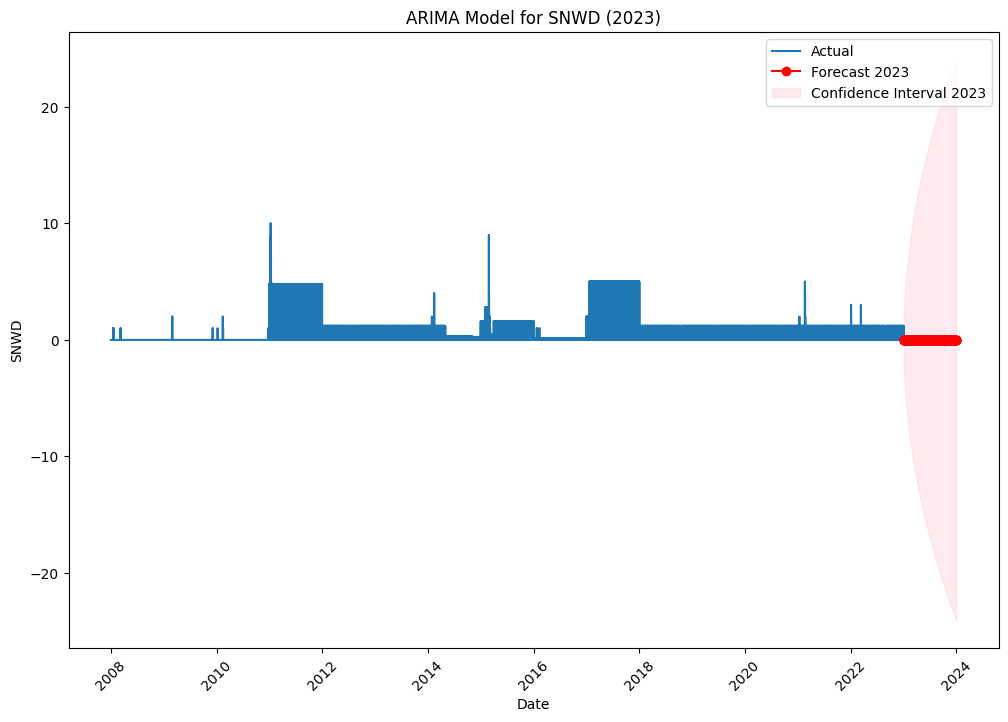

In [57]:
# Plot the actual values, and forecast for 2023
plt.figure(figsize=(12, 8))
plt.plot(AL_TES_num['SNWD'], label='Actual')
plt.plot(mean_forecast_2023.index, mean_forecast_2023, color='red', label='Forecast 2023', marker='o')
plt.fill_between(mean_forecast_2023.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Interval 2023')

# Customize the plot
plt.title('ARIMA Model for SNWD (2023)')
plt.xlabel('Date')
plt.ylabel('SNWD')
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [58]:
# Generate predictions for the extended period
one_step_forecast = model_SNWD.get_prediction(steps=12)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:, 'lower SNWD']
upper_limits = confidence_intervals.loc[:, 'upper SNWD']

mean_forecast.index = AL_TES.index[-len(mean_forecast):]

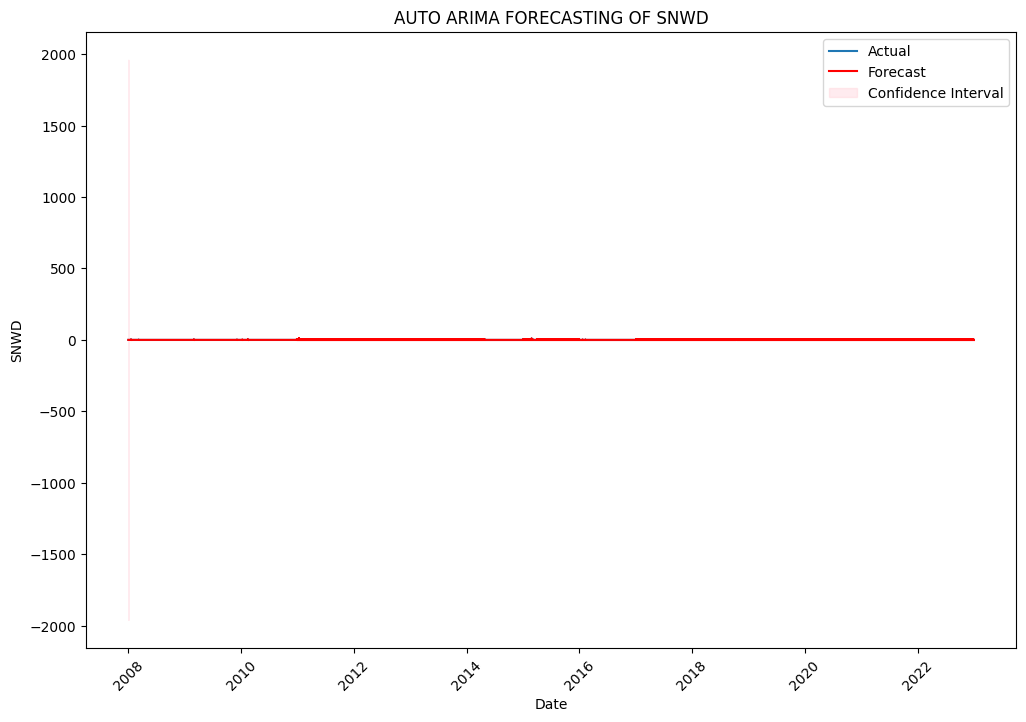

In [59]:
# Plot the 'SNWD' with correct date index
plt.figure(figsize=(12, 8))
plt.plot(AL_TES_num.index, AL_TES_num['SNWD'], label='Actual')
plt.plot(mean_forecast.index, mean_forecast, color='red', label='Forecast')

# Fill the area between confidence intervals
plt.fill_between(mean_forecast.index, lower_limits, upper_limits, color='pink', alpha=0.3, label='Confidence Interval')

# Customizing the plot
plt.title('AUTO ARIMA FORECASTING OF SNWD')
plt.xlabel('Date')
plt.ylabel('SNWD')
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [60]:
# Ensure the index of mean_forecast is of type DatetimeIndex
mean_forecast.index = pd.DatetimeIndex(mean_forecast.index)

# Extract actual values for the forecast period using the time range of the forecast
forecast_start_date = mean_forecast.index[0]
forecast_end_date = mean_forecast.index[-1]
actual_values = AL_TES_num['SNWD'][(AL_TES_num.index >= forecast_start_date) & (AL_TES_num.index <= forecast_end_date)]

# Calculate error metrics for the one-step-ahead forecast
mae = mean_absolute_error(actual_values, mean_forecast)
rmse = np.sqrt(mean_squared_error(actual_values, mean_forecast))
mape = np.mean(np.abs((actual_values - mean_forecast) / actual_values)) * 100
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAPE: {mape:.2f}%')

MAE: 0.16
RMSE: 0.64
MAPE: inf%
